In [24]:
# import airlines csv 
#convert the date column to dat time index
#create a 6 month rolling moving average and add to column as well as 12 months
#calculate the EWM on the data set for 12 months and explain the difference beteen the (ewm) two (span12 months)
#calculate ETS usinf statssmodel.etf.seasonal import seasonl_decompose - 
#using the additive(use when the trend is more linear) and multiplicative model

#ETS Model - Error. Trend, Sasinality - >Mpdel that allows us to break d
#own our data into each of these and evaluate them on that data, Risiduall 
#( Data Not explained by seasinal or Trend )

#persform that Ets ddecompotion to eveluate the data



### EWMA Model -> simple moving average 6 month and 12 month as we did with rolling = can be improved with Exponentinally Weighted Moving average because SMA has missing values and does not innform you of future behavior

#### allos us to reduce on lag and put more weight on recent values. Apply more weight to recent values. Values get closer we 
###  add more weight

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [7]:
airlines = pd.read_csv("resources/airline_passengers.csv", index_col="Month")

In [8]:
airlines.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [9]:
airlines.dropna(inplace=True)

In [10]:
airlines.index = pd.to_datetime(airlines.index)

In [11]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Thousands of Passengers    144 non-null float64
dtypes: float64(1)
memory usage: 2.2 KB


In [13]:
airlines.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [14]:
airlines["6-month MA"] = airlines["Thousands of Passengers"].rolling(6).mean()

In [15]:
airlines["12-month MA"] = airlines["Thousands of Passengers"].rolling(12).mean()

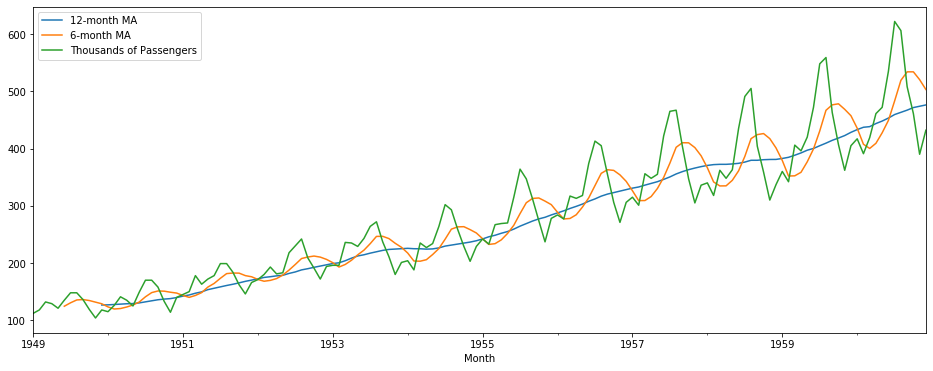

In [19]:
airlines[["12-month MA","6-month MA", "Thousands of Passengers"]].plot(figsize = (16,6))

# perform a EWMA(exponentionally weighted moving average) -overcomes the short comings of the SMA (Simple moving average) -windows, lag(missing values), does not reach peak due to averaging, recent points have more weight

In [20]:
airlines["EWMA-12"] = airlines["Thousands of Passengers"].ewm(span=12).mean()

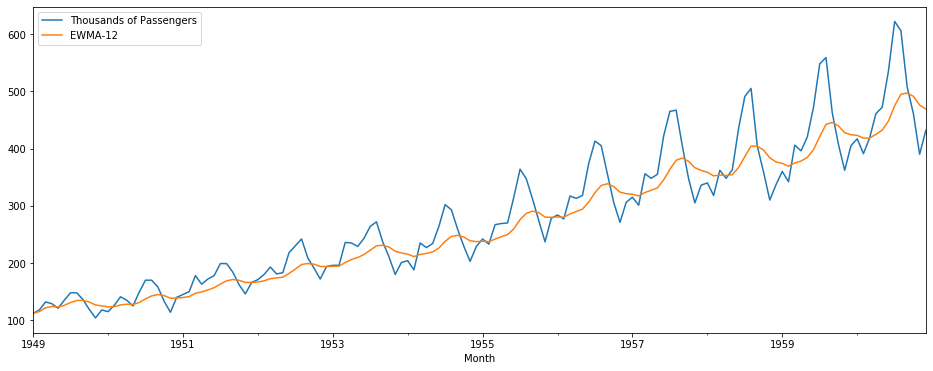

In [23]:
airlines[["Thousands of Passengers", "EWMA-12"]].plot(figsize = (16,6))

## WE will calculate ETS (Error , Trend, Seaaonal) 

In [25]:
airlines

,Thousands of Passengers,6-month MA,12-month MA,EWMA-12
Month,,,,
1949-01-01,112.0,NaN,NaN,112.000000
1949-02-01,118.0,NaN,NaN,115.250000
1949-03-01,132.0,NaN,NaN,121.787529
1949-04-01,129.0,NaN,NaN,124.064224
1949-05-01,121.0,NaN,NaN,123.231685
...,...,...,...,...
1960-08-01,606.0,519.166667,463.333333,494.898620
1960-09-01,508.0,534.000000,467.083333,496.914217
1960-10-01,461.0,534.000000,471.583333,491.388952


In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
result = seasonal_decompose(airlines["Thousands of Passengers"], model="multiplicative")

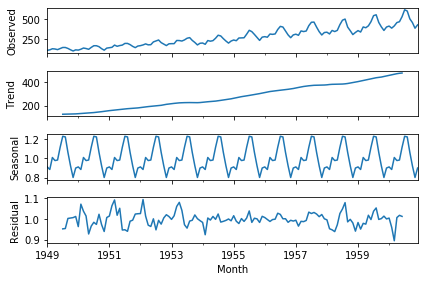

In [34]:
fig = result.plot()